In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
print("All libraries succesfully imported")

All libraries succesfully imported


In [5]:
#loading the credit card dataset 
creditCard_df= pd.read_csv("c:\\Users\\pc\\downloads\\creditcard.csv")

In [6]:
creditCard_df


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


In [7]:
# first 5 raw of the dataset
creditCard_df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [10]:
# last 5 raw of the dataset
creditCard_df.tail()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0
284806,172792.0,-0.533413,-0.189733,0.703337,-0.506271,-0.012546,-0.649617,1.577006,-0.414650,0.486180,...,0.261057,0.643078,0.376777,0.008797,-0.473649,-0.818267,-0.002415,0.013649,217.00,0


In [8]:
#Dataset Information
creditCard_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [9]:
#checking the number of missing value in dataset 
creditCard_df.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [10]:
#Disrtibution of legit transcation and fraudelent transactions
creditCard_df['Class'].value_counts()
#this dataset is highly unbalenced(0-legit transaction, 1-fraudelent transaction)

0    284315
1       492
Name: Class, dtype: int64

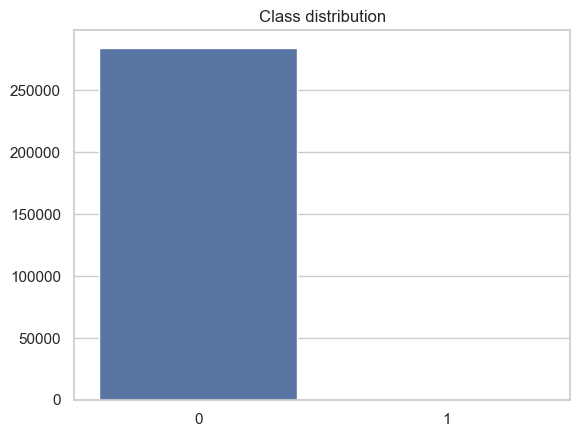

In [11]:
sns.set(style= 'whitegrid')

class_counts =creditCard_df['Class'].value_counts()

sns.barplot(x= class_counts.index, y= class_counts.values)
plt.title('Class distribution')
plt.show()

In [12]:
#Seperating the dataset for analysis
legit=creditCard_df[creditCard_df.Class==0]
fraud= creditCard_df[creditCard_df.Class == 1]

In [13]:
print( legit.shape)
print(fraud.shape)

(284315, 31)
(492, 31)


In [14]:
#Statistical description of the legit dataset
legit.Amount.describe()

count    284315.000000
mean         88.291022
std         250.105092
min           0.000000
25%           5.650000
50%          22.000000
75%          77.050000
max       25691.160000
Name: Amount, dtype: float64

In [15]:
#Compare the values for oth transaction
creditCard_df.groupby('Class').mean()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,
0,94838.202258,0.008258,-0.006271,0.012171,-0.007860,0.005453,0.002419,0.009637,-0.000987,0.004467,...,-0.000644,-0.001235,-0.000024,0.000070,0.000182,-0.000072,-0.000089,-0.000295,-0.000131,88.291022
1,80746.806911,-4.771948,3.623778,-7.033281,4.542029,-3.151225,-1.397737,-5.568731,0.570636,-2.581123,...,0.372319,0.713588,0.014049,-0.040308,-0.105130,0.041449,0.051648,0.170575,0.075667,122.211321


In [ ]:
#Dealing with the unbalanced data(284315 and 494): understanding


In [16]:
#Build a simple dataset containing similaer distribution od legit transcation and fraudelent transactions
#The number of fraudelent transactions is 492
legit_sample = legit.sample(n= 492)
#Concatenating/joining the two datatset
new_df = pd.concat([legit_sample, fraud], axis= 0)
new_df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
106544,70004.0,-1.695203,0.856002,1.639338,-0.697651,0.836150,0.158427,0.789394,0.040327,-0.176922,...,-0.311133,-0.434499,-0.023138,-0.353822,0.045008,-0.035742,-0.664669,-0.680961,6.93,0
175363,122300.0,-2.564508,2.559861,-1.444283,-1.427040,1.253978,-0.493516,1.874040,-0.938490,2.915035,...,-1.103476,-0.990254,-0.020688,-0.081446,0.209869,0.046604,0.423176,-0.463134,36.48,0
130910,79458.0,-0.639350,0.829087,0.647857,-2.080097,-0.136483,-1.218923,0.430417,0.157904,0.228556,...,-0.054546,-0.197515,-0.137049,-0.067150,-0.117330,-0.166720,-0.010122,0.050781,1.66,0
179126,123933.0,0.380426,0.718079,-0.981330,-1.093080,2.104716,-0.249100,1.897810,-0.890519,0.071104,...,0.040155,0.776549,-0.313947,-0.073136,-0.332045,0.450106,-0.491378,-0.561402,0.76,0
218020,141136.0,-0.664947,0.304280,0.803210,-2.686838,1.118795,0.807403,0.571805,0.198440,-1.752510,...,0.512884,1.462134,-0.549800,-0.268857,0.904520,0.173104,0.023306,0.025065,10.00,0


In [17]:
new_df['Class'].value_counts()

0    492
1    492
Name: Class, dtype: int64

In [18]:
new_df.groupby('Class').mean()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,
0,92250.725610,0.039357,0.024547,0.118980,-0.028202,0.024923,-0.016032,0.013720,-0.064765,0.082269,...,-0.066553,-0.080455,-0.007552,0.029353,0.000105,0.021059,0.006596,0.012761,-0.004312,68.784573
1,80746.806911,-4.771948,3.623778,-7.033281,4.542029,-3.151225,-1.397737,-5.568731,0.570636,-2.581123,...,0.372319,0.713588,0.014049,-0.040308,-0.105130,0.041449,0.051648,0.170575,0.075667,122.211321


In [19]:
#Splitting the dataset int features and target
X = new_df.drop(columns='Class', axis= 1)
Y= new_df['Class']
print(X)
print(Y)

            Time        V1        V2        V3        V4        V5        V6  \
106544   70004.0 -1.695203  0.856002  1.639338 -0.697651  0.836150  0.158427   
175363  122300.0 -2.564508  2.559861 -1.444283 -1.427040  1.253978 -0.493516   
130910   79458.0 -0.639350  0.829087  0.647857 -2.080097 -0.136483 -1.218923   
179126  123933.0  0.380426  0.718079 -0.981330 -1.093080  2.104716 -0.249100   
218020  141136.0 -0.664947  0.304280  0.803210 -2.686838  1.118795  0.807403   
...          ...       ...       ...       ...       ...       ...       ...   
279863  169142.0 -1.927883  1.125653 -4.518331  1.749293 -1.566487 -2.010494   
280143  169347.0  1.378559  1.289381 -5.004247  1.411850  0.442581 -1.326536   
280149  169351.0 -0.676143  1.126366 -2.213700  0.468308 -1.120541 -0.003346   
281144  169966.0 -3.113832  0.585864 -5.399730  1.817092 -0.840618 -2.943548   
281674  170348.0  1.991976  0.158476 -2.583441  0.408670  1.151147 -0.096695   

              V7        V8        V9  .

In [ ]:
# MACHINE LEARNING MODEL


In [20]:
#Splitting the data into training and testing data
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, stratify=Y, random_state =2)
print(X.shape, X_train.shape, X_test.shape) 
print("\nSplitted successfully")

(984, 30) (787, 30) (197, 30)

Splitted successfully


In [21]:
#Logistic Regression
model = LogisticRegression()
model.fit(X_train, Y_train)

E:\Data Science And Statistics\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

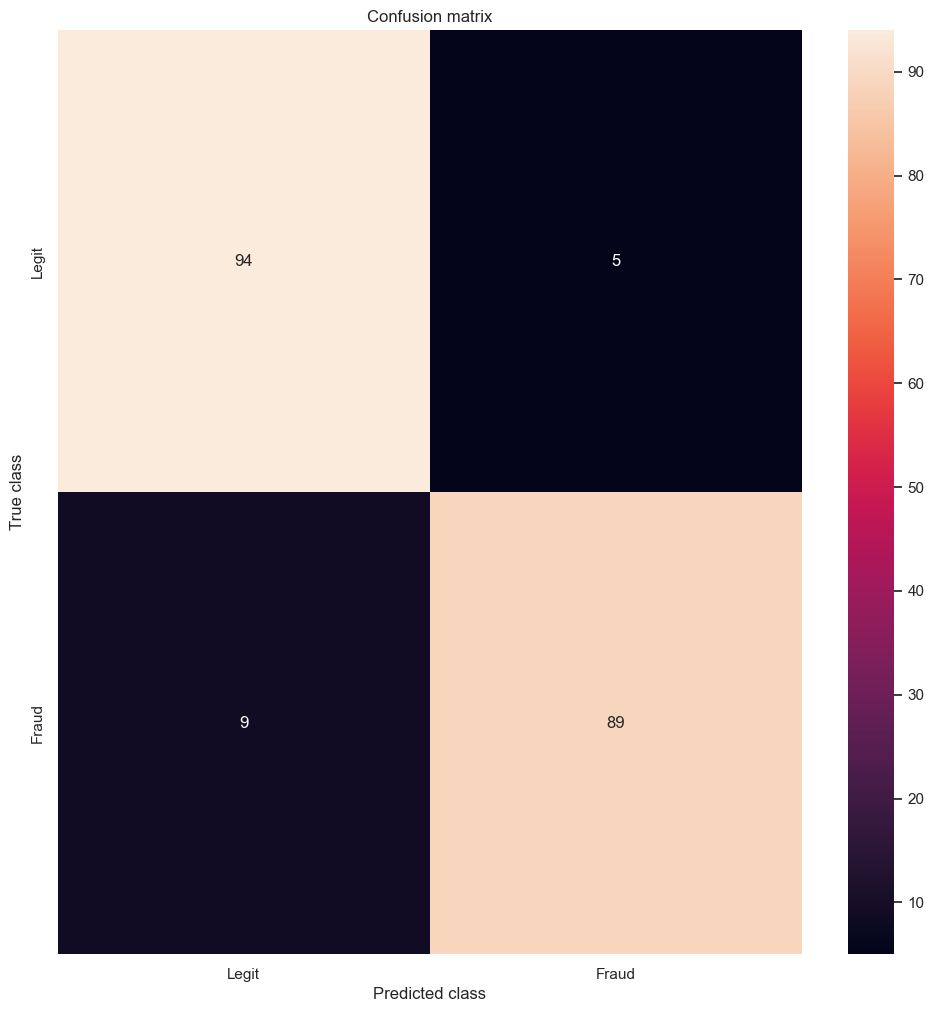

In [24]:
# Visualizing the confusion matrix
y_pred_log = model.predict(X_test)
LABELS = ['Legit', 'Fraud']
from sklearn.metrics import confusion_matrix
conf_matrix = confusion_matrix(Y_test, y_pred_log)
plt.figure(figsize =(12, 12))
sns.heatmap(conf_matrix, xticklabels = LABELS, yticklabels = LABELS, annot = True, fmt = "d");
plt.title("Confusion matrix")
plt.ylabel('True class')
plt.xlabel('Predicted class')
plt.show()

In [ ]:
# MODEL EVALUATION 

In [28]:
#Accuracy score
#Accurecy on training data
X_train_prediction = model.predict(X_train)
training_data_accuracy = accuracy_score(X_train_prediction, Y_train)
print("Accuracy on tarining data is :", training_data_accuracy)

Accuracy on tarining data is : 0.9440914866581956


In [33]:
#Accuracy on test_data
X_test_prediction = model.predict(X_test)
testing_data_accuracy = accuracy_score(X_test_prediction, Y_test)
print("Accuracy on training data is :",testing_data_accuracy)

Accuracy on training data is : 0.9289340101522843


In [ ]:
#The end

In [ ]:
# first 5 raw of the dataset